In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.1f}'.format

In [59]:
nyc_crime = pd.read_csv('nyc_crime.csv')
nyc_crime[['Population']] = nyc_crime['Population'].str.replace(',','')
nyc_crime[['Violent Crime']] = nyc_crime['Violent Crime'].str.replace(',','')
nyc_crime[['Rape(Legal)']] = nyc_crime['Rape(Legal)'].str.replace(',','')
nyc_crime[['Property Crime']] = nyc_crime['Property Crime'].str.replace(',','')
nyc_crime[['Vehicle Theft']] = nyc_crime['Vehicle Theft'].str.replace(',','')
nyc_crime[['Larceny']] = nyc_crime['Larceny'].str.replace(',','')
nyc_crime[['Burglary']] = nyc_crime['Burglary'].str.replace(',','')
nyc_crime[['Robbery']] = nyc_crime['Robbery'].str.replace(',','')
nyc_crime[['Agg Assault']] = nyc_crime['Agg Assault'].str.replace(',','')
nyc_crime[
    ['Population', 'Violent Crime', 'Murder', 'Rape(Legal)', 'Robbery', 
     'Agg Assault', 'Property Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']
    ] = nyc_crime[
    ['Population', 'Violent Crime', 'Murder', 'Rape(Legal)', 'Robbery', 
     'Agg Assault', 'Property Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']
    ].astype(float)
nyc_crime['robbery_bool'] = np.where(nyc_crime['Robbery'] > 0, 1, 0)
nyc_crime['murder_bool'] = np.where(nyc_crime['Murder'] > 0, 1, 0)
to_drop = ['New York']
nyc_crime = nyc_crime[~nyc_crime['City'].isin(to_drop)]
nyc_crime.head(10)

,City,Population,Violent Crime,Murder,Rape (Rev),Rape(Legal),Robbery,Agg Assault,Property Crime,Burglary,Larceny,Vehicle Theft,Arson,robbery_bool,murder_bool
0,Adams Village,1861.0,0.0,0.0,nan,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0,0
1,Addison Town and Village,2577.0,3.0,0.0,nan,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0,0
2,Akron Village,2846.0,3.0,0.0,nan,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0,0
3,Albany,97956.0,791.0,8.0,nan,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,nan,1,1
4,Albion Village,6388.0,23.0,0.0,nan,3.0,4.0,16.0,223.0,53.0,165.0,5.0,nan,1,0
5,Alfred Village,4089.0,5.0,0.0,nan,0.0,3.0,2.0,46.0,10.0,36.0,0.0,nan,1,0
6,Allegany Village,1781.0,3.0,0.0,nan,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0,0,0
7,Amherst Town,118296.0,107.0,1.0,nan,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0,1,1
8,Amityville Village,9519.0,9.0,0.0,nan,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0,1,0
9,Amsterdam,18182.0,30.0,0.0,nan,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0,1,0


In [60]:
regr = linear_model.LinearRegression()
# Mentor Q, why the reshape?
Y = nyc_crime['Property Crime'].values.reshape(-1, 1)
X = nyc_crime[['Robbery', 'Murder', 'robbery_bool', 'murder_bool']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  7.14239343  68.59916254 241.81642841 178.99938574]]

Intercept: 
 [46.90936296]

R-squared:
0.8943995890181653


ValueError: x and y must be the same size

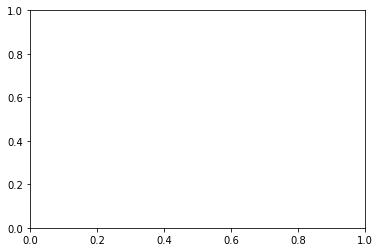

In [62]:
plt.scatter(, X)

In [51]:
predicted = regr.predict(X).ravel()
actual = nyc_crime['Property Crime']
residual = actual - predicted

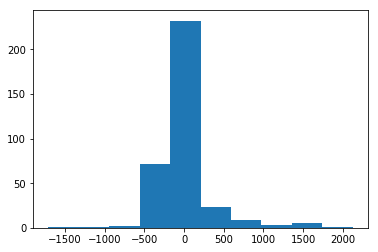

In [52]:
plt.hist(residual)
plt.show()

Text(0,0.5,'Residual')

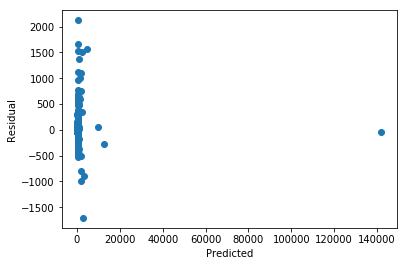

In [53]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')